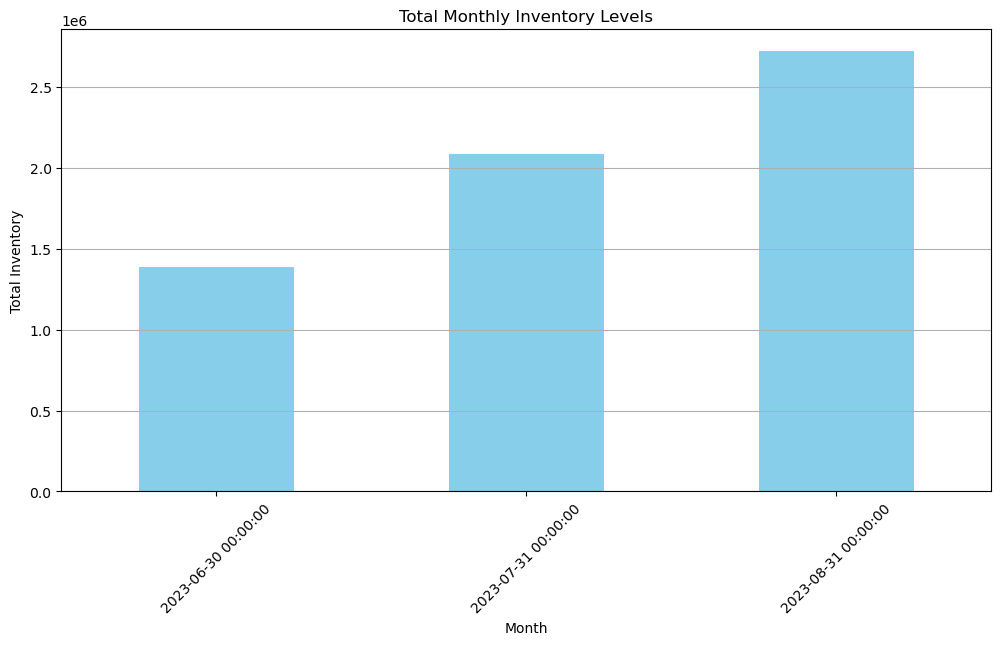

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import Day

inventory_path = 'data/Inventory Dataset.xlsx'
new_inventory_path = 'data/New Inventory.xlsx'

inventory_df = pd.read_excel(inventory_path)
new_inventory_df = pd.read_excel(new_inventory_path)

# Convert date columns
inventory_df['Date'] = pd.to_datetime(inventory_df['Date'])
new_inventory_df['Inventory Receive'] = pd.to_datetime(new_inventory_df['Inventory Receive'])

# Create a date range
start_date = inventory_df['Date'].min()
end_date = pd.to_datetime('2023-08-26')
date_range = pd.date_range(start_date, end_date)

# Initialize a dataframe to store future inventory levels
future_inventory_df = pd.DataFrame({'Item Number': inventory_df['Item Number'].unique()})
future_inventory_df = future_inventory_df.set_index('Item Number')

# dataframe with initial inventory values
for item in future_inventory_df.index:
    future_inventory_df.loc[item, start_date] = inventory_df.loc[inventory_df['Item Number'] == item, 'Inventory'].values[0]

# Update the inventory for each day 
for date in date_range:
    if date != start_date:
        future_inventory_df[date] = future_inventory_df[date - Day(1)]
    if date in new_inventory_df['Inventory Receive'].values:
        for item in future_inventory_df.index:
            additional_inventory = new_inventory_df[(new_inventory_df['Item Number'] == item) & (new_inventory_df['Inventory Receive'] == date)]['Total Item Qty'].sum()
            future_inventory_df.loc[item, date] += additional_inventory

future_inventory_df = future_inventory_df.transpose()
future_inventory_df.index = future_inventory_df.index.date

future_inventory_df.index = pd.to_datetime(future_inventory_df.index)

# Calculate the total inventory at the end of each month
monthly_inventory = future_inventory_df.resample('M').last().sum(axis=1)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
monthly_inventory.plot(kind='bar', color='skyblue')
plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the bar chart
plt.show()
